# Building a cat search engine with `docarray`

[DocArray](https://docarray.jina.ai) is a library for nested, unstructured data in transit, including text, image, audio, video, 3D mesh, etc. It allows deep-learning engineers to efficiently process, embed, search, recommend, store, and transfer the data with a Pythonic API.

In this example we'll use DocArray to build a simple search engine for cat images. You'll be able to upload an image of cats and find similar matches in the dataset.


## Configuration

We'll set up some basic variables. Feel free to adapt these for your own project!

In [ ]:
'''Jina for medical data science https://github.com/georgeamccarthy/protein_search'''


In [1]:
toy_data_url = "https://github.com/CatStark/example-docarray/blob/main/dataset.zip?raw=true"
data_dir = "./dataset"
query_image = "./1.jpg" # image we'll use to search with



## Setup

In [2]:
from docarray import Document, DocumentArray
import torchvision

## Load images

In [14]:
# Download images if they don't exist
data_dir = "dataset/dataset"
max_files = 100

docs = DocumentArray.from_files(
    f"{data_dir}/*.jpg", size=max_files
)

## Apply preprocessing

In [15]:
# Define preprocessing
def preproc(d: Document):
    return (
        d.load_uri_to_image_tensor()
            .set_image_tensor_shape((180, 160))
            .set_image_tensor_normalization()
            .set_image_tensor_channel_axis(-1, 0)
    )



In [16]:
# Apply pre-processing
docs.apply(preproc)

                       Documents Summary                       
                                                               
  Length                 100                                   
  Homogenous Documents   True                                  
  Common Attributes      ('id', 'tensor', 'mime_type', 'uri')  
                                                               
                      Attributes Summary                       
                                                               
  Attribute   Data type      #Unique values   Has empty value  
 ───────────────────────────────────────────────────────────── 
  id          ('str',)       100              False            
  mime_type   ('str',)       1                False            
  tensor      ('ndarray',)   100              False            
  uri         ('str',)       100              False

## Embed images

In [18]:
# Convert images into embeddings
model = torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\MBRO/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
80.9%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


In [20]:
docs.embed(model, device="cpu")  # turn this into GPU if available

                             Documents Summary                              
                                                                            
  Length                 100                                                
  Homogenous Documents   True                                               
  Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')  
                                                                            
                      Attributes Summary                       
                                                               
  Attribute   Data type      #Unique values   Has empty value  
 ───────────────────────────────────────────────────────────── 
  embedding   ('Tensor',)    100              False            
  id          ('str',)       100              False            
  mime_type   ('str',)       1                False            
  tensor      ('ndarray',)   100              False            
  uri         ('str',)       100              False

##Query image



In [28]:
f"{data_dir}/1.jpg"

'dataset/dataset/1.jpg'

In [21]:
# Create Query image
query_doc = Document(uri=f"{data_dir}/1.jpg")

In [22]:
# Convert image to tensor
query_doc.load_uri_to_image_tensor()

📄 Document: cc2a439860e90ad4c33aed1de56d5f1d
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute ┃ Value                 ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ tensor    │ [[[  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   ...                 │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]]      │
│           │                       │
│           │  [[  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   ...                 │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]]      │
│           │                       │
│           │  [[  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   ...                 │
│           │   [  0   0   0]       │
│           │   [  0   0   0]       │
│           │   [  0   0   0]]      │
│           │                       │
│           │  ...                  │
│           │                       │
│           │  [[113 176 220]       │
│           │   [113 176 220]       │
│           │   [113 176 220]       │
│           │   ...                 │
│           │   [166 168 163]       │
│           │   [160 160 160]       │
│           │   [155 155 155]]      │
│           │                       │
│           │  [[114 177 221]       │
│           │   [115 178 222]       │
│           │   [115 178 222]       │
│           │   ...                 │
│           │   [170 172 167]       │
│           │   [161 161 161]       │
│           │   [155 155 155]]      │
│           │                       │
│           │  [[114 177 221]       │
│           │   [115 178 222]       │
│           │   [115 178 222]       │
│           │   ...                 │
│           │   [170 173 166]       │
│           │   [159 159 159]       │
│           │   [153 153 153]]]     │
│ mime_type │ image/jpeg            │
│ uri       │ dataset/dataset/1.jpg │
└───────────┴───────────────────────┘

In [23]:
# Apply preprocessing
query_doc = preproc(query_doc)

In [24]:
# Embed image query
query_doc.embed(model, device="cpu")

📄 Document: cc2a439860e90ad4c33aed1de56d5f1d
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Attribute ┃ Value                                                                     ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tensor    │ [[[-2.117904   -2.117904   -2.117904   ... -2.117904   -2.117904          │
│           │    -2.117904  ]                                                           │
│           │   [-2.117904   -2.117904   -2.117904   ... -2.117904   -2.117904          │
│           │    -2.117904  ]                                                           │
│           │   [-2.117904   -2.117904   -2.117904   ... -2.117904   -2.117904          │
│           │    -2.117904  ]                                                           │
│           │   ...                                                                     │
│           │   [-0.18280679 -0.18280679 -0.18280679 ...  0.7590547   0.74193           │
│           │     0.70768046]                                                           │
│           │   [-0.18280679 -0.18280679 -0.18280679 ...  0.7590547   0.72480524        │
│           │     0.6220567 ]                                                           │
│           │   [-0.16568205 -0.14855729 -0.14855729 ...  0.8446785   0.79330426        │
│           │     0.63918144]]                                                          │
│           │                                                                           │
│           │  [[-2.0357141  -2.0357141  -2.0357141  ... -2.0357141  -2.0357141         │
│           │    -2.0357141 ]                                                           │
│           │   [-2.0357141  -2.0357141  -2.0357141  ... -2.0357141  -2.0357141         │
│           │    -2.0357141 ]                                                           │
│           │   [-2.0357141  -2.0357141  -2.0357141  ... -2.0357141  -2.0357141         │
│           │    -2.0357141 ]                                                           │
│           │   ...                                                                     │
│           │   [ 1.0455183   1.0455183   1.0455183  ...  0.94047624  0.9229692         │
│           │     0.8529412 ]                                                           │
│           │   [ 1.0455183   1.0455183   1.0455183  ...  0.94047624  0.90546227        │
│           │     0.76540625]                                                           │
│           │   [ 1.0630252   1.0805323   1.0805323  ...  1.0280112   0.9754903         │
│           │     0.78291327]]                                                          │
│           │                                                                           │
│           │  [[-1.8044444  -1.8044444  -1.8044444  ... -1.8044444  -1.8044444         │
│           │    -1.8044444 ]                                                           │
│           │   [-1.8044444  -1.8044444  -1.8044444  ... -1.8044444  -1.8044444         │
│           │    -1.8044444 ]                                                           │
│           │   [-1.8044444  -1.8044444  -1.8044444  ... -1.8044444  -1.8044444         │
│           │    -1.8044444 ]                                                           │
│           │   ...                                                                     │
│           │   [ 2.0299783   2.0299783   2.0299783  ...  1.0713727   1.0539435         │
│           │     1.0713727 ]                                                           │
│           │   [ 2.0299783   2.0299783   2.0299783  ...  1.0713727   1.0365143         │
│           │     0.98422676]                                                           │
│           │   [ 2.0474076   2.0648367   2.0648367  ...  1.1585187   1.1062311         │
│           │     1.0016559 ]]]                                                      

## Get matches

In [25]:
matches = query_doc.match(docs, limit=4).matches


## See the results



In [26]:
# Define reverse pre processing
def reverse_preproc(d: Document):
    return (d.set_image_tensor_channel_axis(0, -1)).set_image_tensor_inv_normalization()

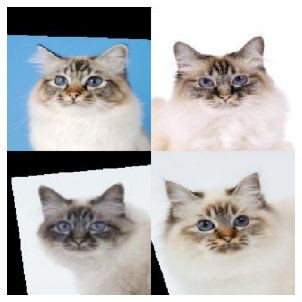

In [27]:
matches.apply(reverse_preproc).plot_image_sprites()
